#### Imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire
import wrangle as w
import env

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [2]:
# Acquire Data
df = w.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#Prepare Data
df = w.prep_telco(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [4]:
#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

In [5]:
#Check length of train, validate, test
print(len(train))
print(len(validate))
print(len(test))

4922
1055
1055


In [6]:
#Describe the data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.380333,0.220033,0.390492,0.208046,0.245632,0.438643,0.220033,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.485518,0.414310,0.487910,0.405951,0.430505,0.496271,0.414310,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Get data types of columns
train.dtypes

gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type                              object
gender_encoded      

In [16]:
num_vars = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', \
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type', \
            'payment_type']

gender
Male      2483
Female    2439
Name: gender, dtype: int64
Male      50.446973
Female    49.553027
Name: gender, dtype: float64


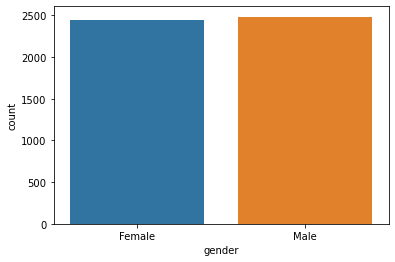

partner
No     2502
Yes    2420
Name: partner, dtype: int64
No     50.832995
Yes    49.167005
Name: partner, dtype: float64


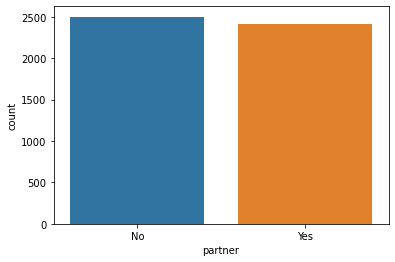

dependents
No     3436
Yes    1486
Name: dependents, dtype: int64
No     69.809021
Yes    30.190979
Name: dependents, dtype: float64


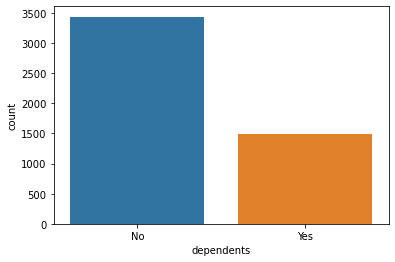

phone_service
Yes    4445
No      477
Name: phone_service, dtype: int64
Yes    90.308818
No      9.691182
Name: phone_service, dtype: float64


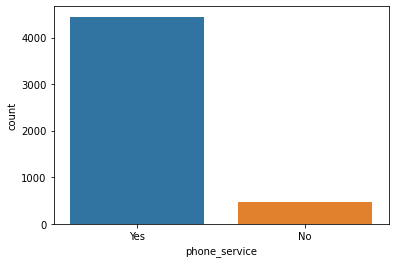

multiple_lines
No                  2392
Yes                 2053
No phone service     477
Name: multiple_lines, dtype: int64
No                  48.598131
Yes                 41.710687
No phone service     9.691182
Name: multiple_lines, dtype: float64


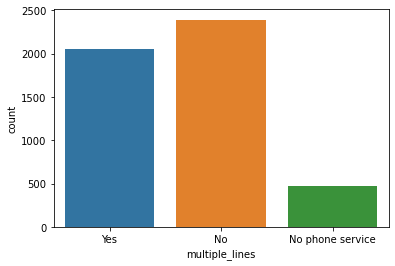

online_security
No                     2437
Yes                    1402
No internet service    1083
Name: online_security, dtype: int64
No                     49.512393
Yes                    28.484356
No internet service    22.003251
Name: online_security, dtype: float64


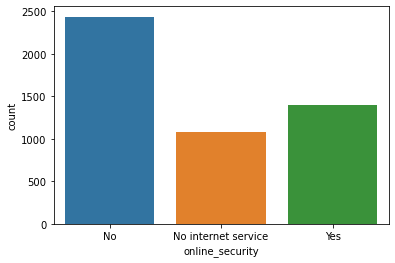

online_backup
No                     2141
Yes                    1698
No internet service    1083
Name: online_backup, dtype: int64
No                     43.498578
Yes                    34.498171
No internet service    22.003251
Name: online_backup, dtype: float64


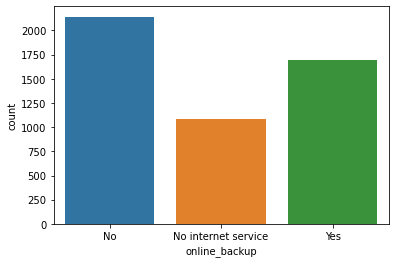

device_protection
No                     2137
Yes                    1702
No internet service    1083
Name: device_protection, dtype: int64
No                     43.417310
Yes                    34.579439
No internet service    22.003251
Name: device_protection, dtype: float64


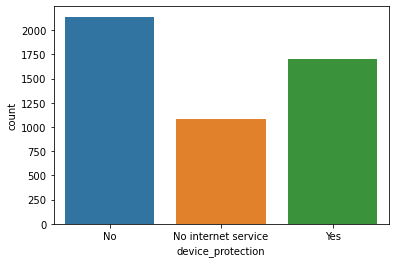

tech_support
No                     2406
Yes                    1433
No internet service    1083
Name: tech_support, dtype: int64
No                     48.882568
Yes                    29.114181
No internet service    22.003251
Name: tech_support, dtype: float64


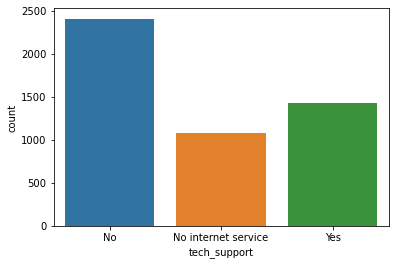

streaming_tv
No                     1967
Yes                    1872
No internet service    1083
Name: streaming_tv, dtype: int64
No                     39.963430
Yes                    38.033320
No internet service    22.003251
Name: streaming_tv, dtype: float64


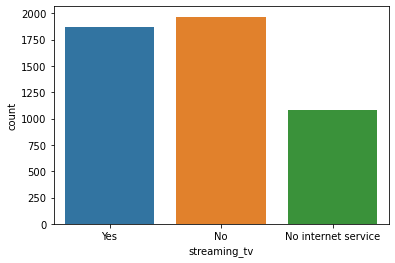

streaming_movies
Yes                    1922
No                     1917
No internet service    1083
Name: streaming_movies, dtype: int64
Yes                    39.049167
No                     38.947582
No internet service    22.003251
Name: streaming_movies, dtype: float64


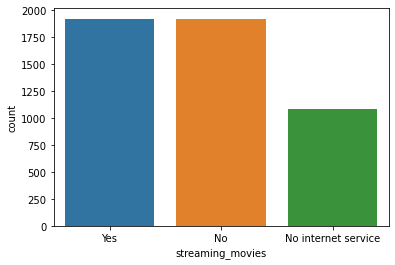

paperless_billing
Yes    2905
No     2017
Name: paperless_billing, dtype: int64
Yes    59.020723
No     40.979277
Name: paperless_billing, dtype: float64


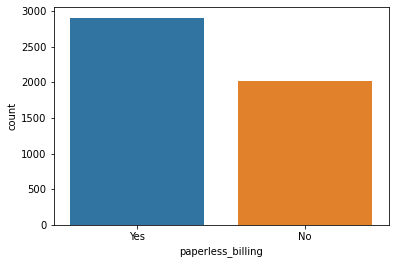

contract_type
Month-to-month    2689
Two year          1209
One year          1024
Name: contract_type, dtype: int64
Month-to-month    54.632263
Two year          24.563186
One year          20.804551
Name: contract_type, dtype: float64


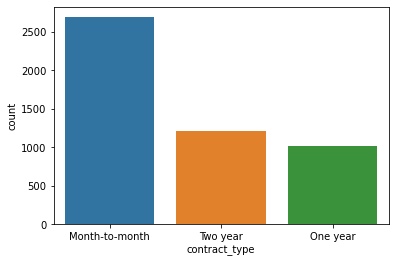

internet_service_type
Fiber optic    2159
DSL            1680
None           1083
Name: internet_service_type, dtype: int64
Fiber optic    43.864283
DSL            34.132466
None           22.003251
Name: internet_service_type, dtype: float64


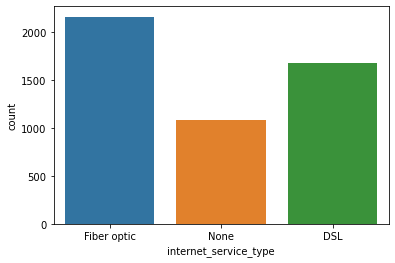

payment_type
Electronic check             1652
Mailed check                 1105
Credit card (automatic)      1103
Bank transfer (automatic)    1062
Name: payment_type, dtype: int64
Electronic check             33.563592
Mailed check                 22.450223
Credit card (automatic)      22.409590
Bank transfer (automatic)    21.576595
Name: payment_type, dtype: float64


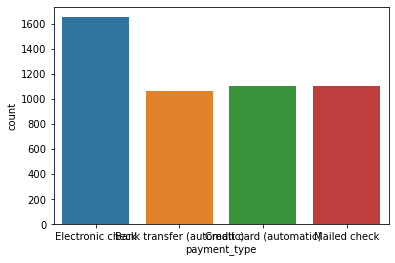

In [14]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

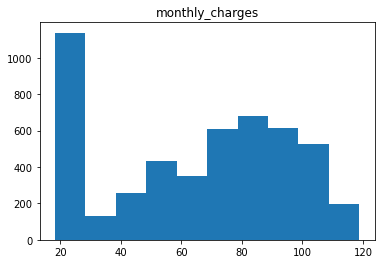

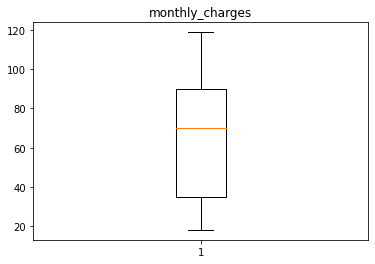

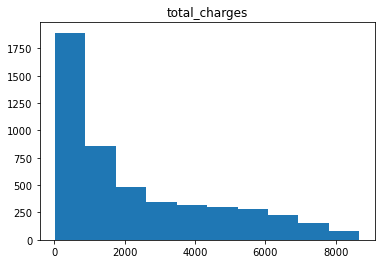

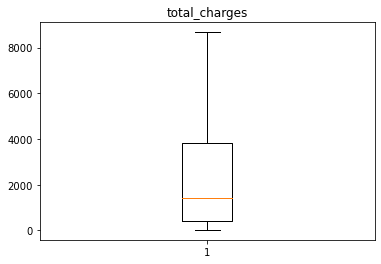

In [15]:
# Visualize float columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

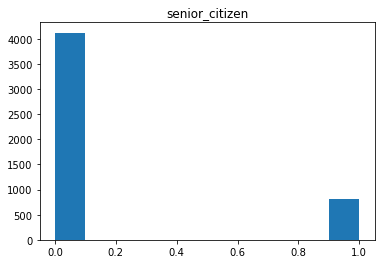

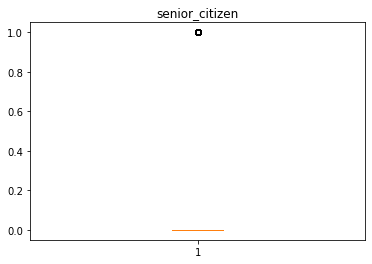

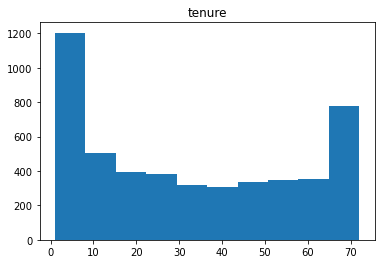

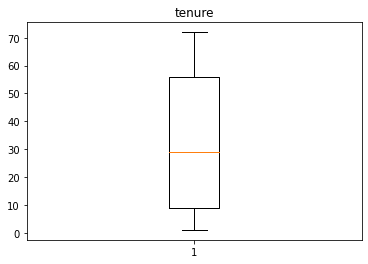

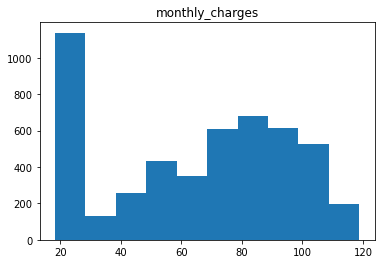

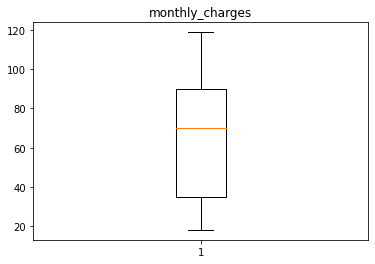

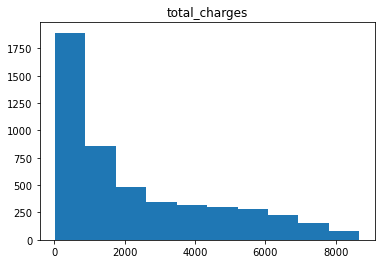

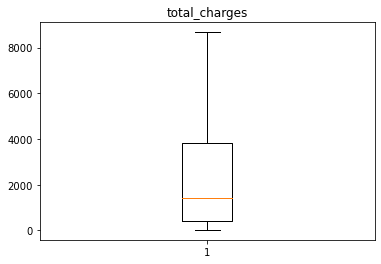

In [17]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()